In [26]:
# Necessary libraries 
import SimpleITK as sitk
import skimage as skimg
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import dicom2nifti
import os 
import fnmatch
import scipy as scpy
import itk
from itkwidgets import view
import itkwidgets
import matplotlib
import ipywidgets
from os import walk

In [60]:
# Hard-coded variables

mother_folder='/Users/lalith/Documents/otto-datasets/CayA'
epsilon=1
niftiFiles = []
for (dirpath, dirnames, filenames) in walk(mother_folder):
    niftiFiles.extend(filenames)
    break
total_num_files=len(niftiFiles)    
    
niftiFiles=sorted(niftiFiles)
pet_frames        =        np.arange(1,len(niftiFiles)+1)
pet_frames

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [64]:
# The part that measures shannon-entropy for structural finger-printing
src_se_list=[]
itk_fixed=sitk.ReadImage(os.path.join(mother_folder,niftiFiles[len(niftiFiles)-1]))
for x in tqdm(range(1,(len(niftiFiles)+1))):
    pass
    itk_moved=sitk.ReadImage(os.path.join(mother_folder,niftiFiles[x-1]))
    moved_img= sitk.GetArrayFromImage(itk_moved)
    fixed_img=sitk.GetArrayFromImage(itk_fixed)
    src_se=skimg.measure.shannon_entropy(sitk.Gradient(itk_moved), base=2)
    src_se_list.append(src_se)
    ref_se=skimg.measure.shannon_entropy(sitk.Gradient(itk_fixed), base=2)
    
src_shannon_val                             =     np.array(src_se_list)
ref_shannon_val                             =     np.array(ref_se)
similarity_shannon                          =     np.array(abs(ref_shannon_val-src_shannon_val))
selected_frames                             =     similarity_shannon<epsilon # Lesser it is better similarity
frames_where_gans_can_be_applied            =     np.where(selected_frames==True)
len(similarity_shannon)

100%|██████████| 21/21 [12:39<00:00, 36.15s/it]


21

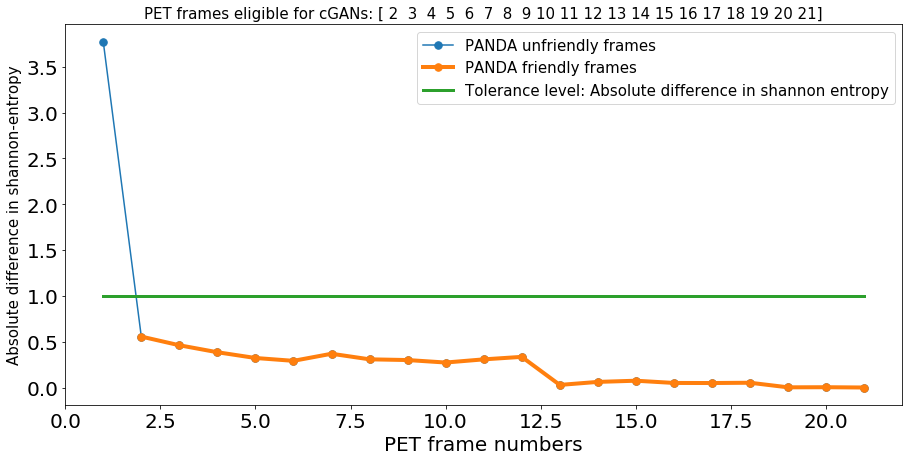

In [65]:
# Plot them all.
plt.rcParams['figure.figsize'] = [15, 7]
plt.title('PET frames eligible for cGANs: '+ str(pet_frames[similarity_shannon<epsilon]),size=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(pet_frames,similarity_shannon,'.-',markersize=15,label='PANDA unfriendly frames')
plt.plot(pet_frames[selected_frames],similarity_shannon[selected_frames],'.-',linewidth=4,markersize=15,label='PANDA friendly frames')
plt.plot(pet_frames,epsilon*np.ones(total_num_files),linewidth=3,label='Tolerance level: Absolute difference in shannon entropy')
plt.xlabel('PET frame numbers',size=20)
plt.ylabel('Absolute difference in shannon-entropy', size=15)
plt.legend(loc="upper right",prop={"size":15})
plt.show()


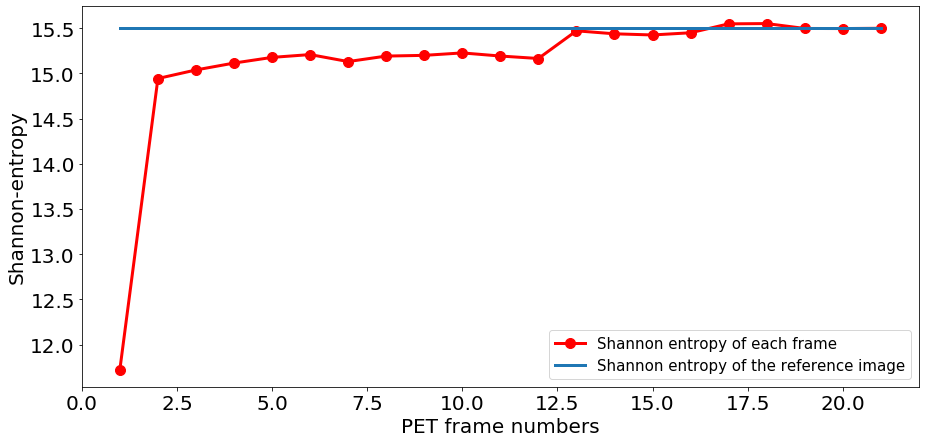

In [66]:
plt.plot(pet_frames,src_shannon_val,'ro-',linewidth=3,markersize=10,label='Shannon entropy of each frame')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('PET frame numbers',size=20)
plt.ylabel('Shannon-entropy', size=20)
plt.plot(pet_frames,ref_shannon_val*np.ones(total_num_files),linewidth=3,label='Shannon entropy of the reference image')
plt.legend(loc="lower right",prop={"size":15})
plt.show()
